## Getting the data

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alkalinity of ash', 'Magnesium', 'Phenolic content',
                  'Flavonoids', 'Non-flavonoid phenols', 'Proanthocyanidins', 'Color intensity', 'Shade',
                   'Transmittancy 280/315 nm', 'Proline']

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

stds = StandardScaler()
X_train_std = stds.fit_transform(X_train)
X_test_std = stds.transform(X_test)

## Eigenvalues and eigenvectors

In [2]:
import numpy as np
covar_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(covar_mat)
print('Eigenvalues: ', eigen_vals)

Eigenvalues:  [4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


## Variance explained

In [3]:
tot = sum(eigen_vals)
var_exp = [(e/tot) for e in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

## Let's visualize the cumultive variance explained through the eigenvalues:

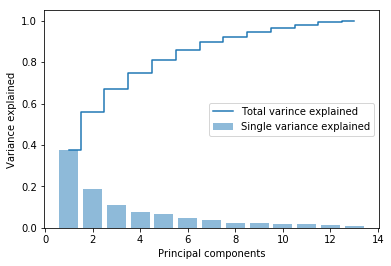

In [6]:
import matplotlib.pyplot as plt
plt.bar(range(1, len(eigen_vals)+1), var_exp, alpha=0.5, align='center', label='Single variance explained')
plt.step(range(1, len(eigen_vals)+1), cum_var_exp, where='mid', label='Total varince explained')
plt.ylabel('Variance explained')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

## Eigen pairs

In [8]:
eigen_pairs = [(eigen_vals[i], eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key = lambda k: k[0], reverse=True)

## Transformation matrix

In [9]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
# hstack - "concatenates" arrays horizontally
# np.newaxis - "expands" the dimensionality of array, see
# https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it
print("W matrix:\n", w)

W matrix:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


## Let's apply the transformation

In [10]:
# Let's try to transform just the first observation from the standardized X matrix:
X_train_std[0].dot(w)

array([2.59891628, 0.00484089])

In [11]:
# Let's apply the tranformation on the whole standardized X matrix:
X_train_pca = X_train_std.dot(w)

## Visualization

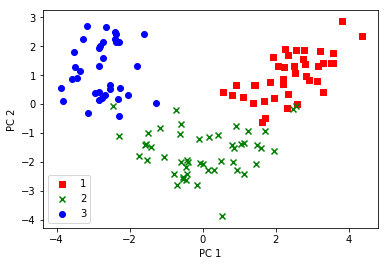

In [12]:
colors = ['r', 'g', 'b']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

# Now the whole flow + discrimimation in sklearn

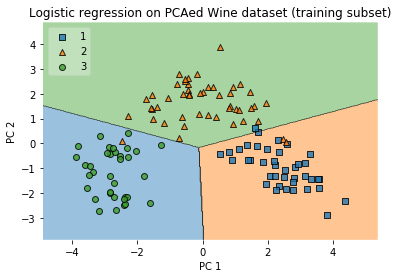

In [18]:
from my_plotter import plot_regions
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca_sk = pca.fit_transform(X_train_std)
X_test_pca_sk = pca.transform(X_test_std)

lr.fit(X_train_pca_sk, y_train)
plot_regions(X_train_pca_sk, y_train, lr, 'PC 1', 'PC 2', 'Logistic regression on PCAed Wine dataset (training subset)')

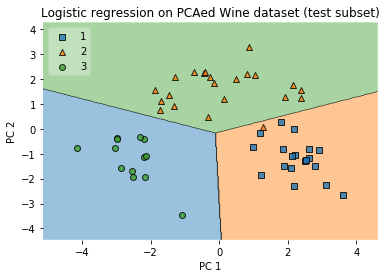

In [19]:
plot_regions(X_test_pca_sk, y_test, lr, 'PC 1', 'PC 2', 'Logistic regression on PCAed Wine dataset (test subset)')

## Let's investigate the total variance explained

In [26]:
pca = PCA(n_components=None)
X_train_pca2 = pca.fit_transform(X_train_std)
print('Variance explained by particular PCs:\n', pca.explained_variance_ratio_)
print('\nTotal variance explained:', pca.explained_variance_ratio_.sum())

Variance explained by particular PCs:
 [0.37329648 0.18818926 0.10896791 0.07724389 0.06478595 0.04592014
 0.03986936 0.02521914 0.02258181 0.01830924 0.01635336 0.01284271
 0.00642076]

Total variance explained: 0.9999999999999998
